# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [ ]:
import numpy as np
import pandas as pd

- Load Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/ionosphere_data.csv')
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.

In [ ]:
data.isna().value_counts()

feature1  feature2  feature3  feature4  feature5  feature6  feature7  feature8  feature9  feature10  feature11  feature12  feature13  feature14  feature15  feature16  feature17  feature18  feature19  feature20  feature21  feature22  feature23  feature24  feature25  feature26  feature27  feature28  feature29  feature30  feature31  feature32  feature33  feature34  label
False     False     False     False     False     False     False     False     False     False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False    351
dtype: int64

In [ ]:
data.isnull().value_counts()

feature1  feature2  feature3  feature4  feature5  feature6  feature7  feature8  feature9  feature10  feature11  feature12  feature13  feature14  feature15  feature16  feature17  feature18  feature19  feature20  feature21  feature22  feature23  feature24  feature25  feature26  feature27  feature28  feature29  feature30  feature31  feature32  feature33  feature34  label
False     False     False     False     False     False     False     False     False     False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False      False    351
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    350
True       1
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Since Feature 2 columns doesnot have any correlation and value other then 0 we can drop it
data.drop('feature2',axis=1,inplace=True)

- Standardized the Input Variables. **Hint**: Centeralized the data

In [ ]:
labels = data.label
data.drop('label',axis=1, inplace=True)

In [ ]:
mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std

In [ ]:
data.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02
mean,3.790619e-16,2.851687e-16,-9.119689e-18,3.427417e-16,-1.714502e-16,-3.628843e-16,1.229969e-16,-8.631191e-16,-2.559857e-16,1.849314e-16,1.052333e-16,-2.413942e-16,5.630417e-18,-2.458351e-16,-1.867554e-16,-6.648650e-16,5.166502e-17,-1.021405e-16,-1.390852e-16,-1.953993e-16,-4.877051e-17,-3.698629e-16,4.916702e-18,1.516247e-16,3.179996e-17,-2.759697e-16,-1.076718e-16,4.123686e-16,7.981711e-17,-1.008717e-16,2.232341e-17,-8.120488e-17,-6.130017e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.904357e+00,-3.304632e+00,-2.362796e+00,-3.084606e+00,-2.419056e+00,-3.150739e+00,-2.147259e+00,-2.984541e+00,-2.439618e+00,-2.621033e+00,-2.332161e+00,-2.251376e+00,-2.206978e+00,-2.058360e+00,-2.334008e+00,-2.235880e+00,-2.002868e+00,-2.170182e+00,-1.877402e+00,-2.191320e+00,-1.943159e+00,-2.256275e+00,-1.784222e+00,-2.413701e+00,-1.823635e+00,-2.983060e+00,-1.701069e+00,-2.393544e+00,-1.910782e+00,-2.366339e+00,-1.936957e+00,-2.581576e+00,-2.163126e+00
25%,3.433265e-01,-3.413421e-01,-2.485773e-01,-3.604887e-01,-3.057630e-01,-6.739843e-01,-3.354767e-01,-8.283469e-01,-4.765567e-01,-7.976767e-01,-4.463784e-01,-6.454830e-01,-3.386764e-01,-5.281429e-01,-3.361751e-01,-6.192388e-01,-4.479696e-01,-5.749484e-01,-4.103875e-01,-5.531427e-01,-4.919077e-01,-6.015214e-01,-5.946351e-01,-6.862559e-01,-5.134830e-01,-4.971705e-01,-6.601286e-01,-6.584964e-01,-4.110400e-01,-6.180549e-01,-4.650660e-01,-6.698099e-01,-3.866285e-01
50%,3.433265e-01,4.631037e-01,-6.288430e-02,4.009943e-01,-2.021770e-01,3.607239e-01,-2.006236e-01,3.414646e-01,-3.327481e-01,3.423951e-01,-2.537731e-01,3.913782e-01,-1.274944e-01,3.955726e-01,-1.554114e-01,3.400358e-01,7.291133e-03,3.489391e-01,4.634961e-02,2.690010e-01,-1.603291e-02,2.789896e-01,1.089919e-01,2.730460e-01,1.103483e-01,3.156983e-01,8.968037e-02,2.076653e-01,5.501647e-02,1.632094e-01,7.397490e-03,1.199694e-01,-3.096219e-02
75%,3.433265e-01,7.176219e-01,3.398379e-01,7.644512e-01,4.748246e-01,8.503508e-01,6.364314e-01,8.694898e-01,7.314106e-01,8.525681e-01,6.622767e-01,8.898756e-01,5.689459e-01,8.788534e-01,5.236190e-01,8.942083e-01,4.002119e-01,8.612683e-01,3.093649e-01,9.159950e-01,3.478470e-01,9.091570e-01,4.211733e-01,8.808216e-01,4.503320e-01,8.892862e-01,4.042325e-01,8.762789e-01,3.581770e-01,8.845776e-01,3.980863e-01,8.916778e-01,3.359939e-01
max,3.433265e-01,7.176219e-01,2.161473e+00,7.644512e-01,1.915315e+00,9.103637e-01,1.688155e+00,9.598458e-01,1.688808e+00,9.267930e-01,1.704523e+00,9.604104e-01,1.828895e+00,1.002074e+00,2.023185e+00,9.974026e-01,2.017450e+00,1.020285e+00,1.970101e+00,1.085034e+00,1.911093e+00,1.053232e+00,2.002205e+00,1.041189e+00,2.104032e+00,8.902109e-01,1.944909e+00,1.076551e+00,2.020815e+00,1.130229e+00,1.951752e+00,1.241956e+00,2.101202e+00


- Encode labels.

In [ ]:
temp = labels.replace({'g':1,'b':0})
labels = temp
labels.value_counts()

1    225
0    125
Name: label, dtype: int64

- Split into 60 and 40 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.4)
len(train_data),len(test_data)

(210, 140)

In [ ]:
test_data, validation_data , test_labels, validation_labels = train_test_split(test_data, test_labels, test_size = 0.4)
len(test_data), len(validation_data)

(84, 56)


- Model : 1 hidden layers including 16 unit.

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(33,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


In [ ]:
history = model.fit( train_data , train_labels , epochs=120 , batch_size=512 ,validation_data=(validation_data,validation_labels))

Epoch 1/120
1/1 [==============================] - 1s 669ms/step - loss: 0.7963 - accuracy: 0.3905 - val_loss: 0.7253 - val_accuracy: 0.3929
Epoch 2/120
1/1 [==============================] - 0s 32ms/step - loss: 0.7335 - accuracy: 0.4286 - val_loss: 0.6891 - val_accuracy: 0.5179
Epoch 3/120
1/1 [==============================] - 0s 31ms/step - loss: 0.6935 - accuracy: 0.5095 - val_loss: 0.6620 - val_accuracy: 0.5714
Epoch 4/120
1/1 [==============================] - 0s 30ms/step - loss: 0.6631 - accuracy: 0.6190 - val_loss: 0.6398 - val_accuracy: 0.6607
Epoch 5/120
1/1 [==============================] - 0s 28ms/step - loss: 0.6383 - accuracy: 0.7143 - val_loss: 0.6208 - val_accuracy: 0.6964
Epoch 6/120
1/1 [==============================] - 0s 31ms/step - loss: 0.6169 - accuracy: 0.7429 - val_loss: 0.6042 - val_accuracy: 0.7321
Epoch 7/120
1/1 [==============================] - 0s 30ms/step - loss: 0.5982 - accuracy: 0.7571 - val_loss: 0.5894 - val_accuracy: 0.7321
Epoch 8/120
1/1 [==

In [ ]:
evaluation = model.evaluate(test_data,test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8690


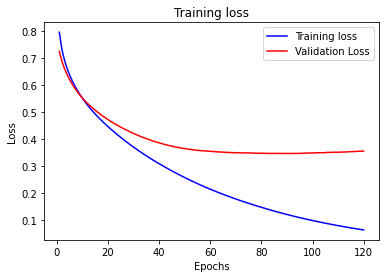

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

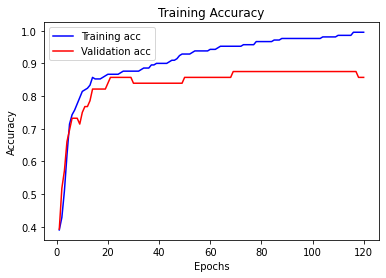

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(f'{evaluation[1] * 100} % is the accuracy achieved on testing data by the created model')

86.90476417541504 % is the accuracy achieved on testing data by the created model
